# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

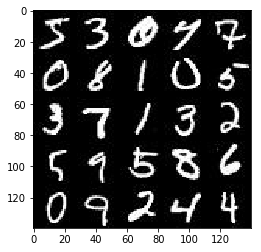

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

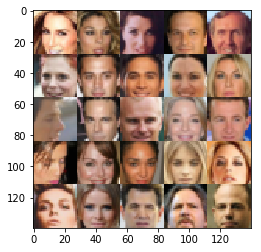

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0


/Applications/anaconda/envs/dlnd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real_image = tf.placeholder(tf.float32, shape=[None, image_width, image_height, \
                        image_channels], name='input_real')
    input_tensor_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate',shape=())
    return input_real_image, input_tensor_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # First convolutional layer
        conv1 = tf.layers.conv2d(images, 56, 5, 2, 'SAME')
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Second convolutional layer
        conv2 = tf.layers.conv2d(conv1, 112, 5, 2, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha*conv2, conv2)
        
        # Third convolutional layer
        conv3 = tf.layers.conv2d(conv2, 224, 5, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha*conv3, conv3)
        
        # Output fully connected layer
        flat   = tf.reshape(conv3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        
        
        logits = tf.layers.dropout(logits, rate=0.5)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
import numpy as np
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # Input fully connected layer
        fully_layer = tf.layers.dense(z, 7*7*112)
        fully_layer = tf.reshape(fully_layer, (-1, 7, 7, 112))
        fully_layer = tf.layers.batch_normalization(fully_layer, training=is_train)
        fully_layer = tf.maximum(alpha*fully_layer, fully_layer)
        
        # First convolutional layer
        conv1 = tf.layers.conv2d_transpose(fully_layer, 56, 5, 2, 'SAME')
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Output convolutional layer
        conv2 = tf.layers.conv2d_transpose(conv1, out_channel_dim, 5, 2, 'SAME')
        out = tf.tanh(conv2)

    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
     # Generator model
    g_model = generator(input_z, out_channel_dim)
    
    # Discriminator models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    
    # Discriminator losses
    d_loss_real = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, \
        labels=tf.ones_like(d_logits_real)*np.random.uniform(0.7, 1.2)))
    d_loss_fake=tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, \
        labels=tf.zeros_like(d_logits_fake)*np.random.uniform(0.0, 0.3)))
    d_loss = d_loss_real + d_loss_fake
    
    # Generator loss
    g_loss = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Run optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    steps = 0
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                # Normalize input to be between -1 and 1 to match generator's images
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)      
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.4992... Generator Loss: 0.1067
Epoch 1/2... Discriminator Loss: 0.8964... Generator Loss: 6.1310
Epoch 1/2... Discriminator Loss: 1.6148... Generator Loss: 0.5541
Epoch 1/2... Discriminator Loss: 2.0275... Generator Loss: 0.3831
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 1.2461
Epoch 1/2... Discriminator Loss: 1.0273... Generator Loss: 1.3018
Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 0.9905
Epoch 1/2... Discriminator Loss: 2.6085... Generator Loss: 5.3421
Epoch 1/2... Discriminator Loss: 0.8580... Generator Loss: 1.5354
Epoch 1/2... Discriminator Loss: 1.0796... Generator Loss: 1.0340


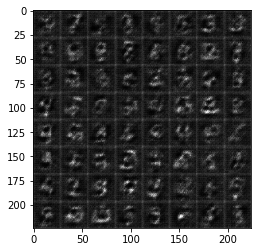

Epoch 1/2... Discriminator Loss: 0.9274... Generator Loss: 1.2759
Epoch 1/2... Discriminator Loss: 0.9443... Generator Loss: 1.3222
Epoch 1/2... Discriminator Loss: 0.7920... Generator Loss: 1.7940
Epoch 1/2... Discriminator Loss: 0.8181... Generator Loss: 1.6226
Epoch 1/2... Discriminator Loss: 1.0537... Generator Loss: 0.9756
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 1.0350
Epoch 1/2... Discriminator Loss: 0.7823... Generator Loss: 1.7488
Epoch 1/2... Discriminator Loss: 0.7880... Generator Loss: 1.5509
Epoch 1/2... Discriminator Loss: 0.8768... Generator Loss: 1.2640
Epoch 1/2... Discriminator Loss: 0.7004... Generator Loss: 2.7107


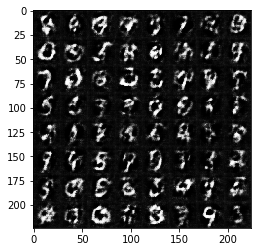

Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.6811
Epoch 1/2... Discriminator Loss: 0.7731... Generator Loss: 1.8626
Epoch 1/2... Discriminator Loss: 0.9429... Generator Loss: 1.2069
Epoch 1/2... Discriminator Loss: 0.8614... Generator Loss: 1.3738
Epoch 1/2... Discriminator Loss: 0.8775... Generator Loss: 1.2892
Epoch 1/2... Discriminator Loss: 0.7590... Generator Loss: 1.6112
Epoch 1/2... Discriminator Loss: 0.8103... Generator Loss: 2.2946
Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.8003
Epoch 1/2... Discriminator Loss: 0.9476... Generator Loss: 1.1169
Epoch 1/2... Discriminator Loss: 0.7667... Generator Loss: 2.9295


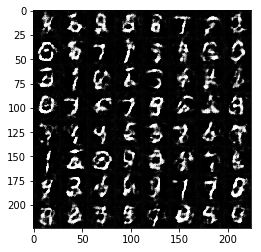

Epoch 1/2... Discriminator Loss: 0.8065... Generator Loss: 2.3502
Epoch 1/2... Discriminator Loss: 0.8755... Generator Loss: 1.4362
Epoch 1/2... Discriminator Loss: 0.7174... Generator Loss: 2.3643
Epoch 1/2... Discriminator Loss: 0.9927... Generator Loss: 1.1480
Epoch 1/2... Discriminator Loss: 0.8066... Generator Loss: 1.5180
Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 2.5134
Epoch 1/2... Discriminator Loss: 1.6971... Generator Loss: 0.5162
Epoch 1/2... Discriminator Loss: 1.5287... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 0.9114... Generator Loss: 1.2935
Epoch 1/2... Discriminator Loss: 1.2938... Generator Loss: 0.7122


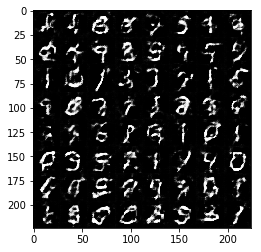

Epoch 1/2... Discriminator Loss: 0.8410... Generator Loss: 1.9205
Epoch 1/2... Discriminator Loss: 0.7514... Generator Loss: 1.7267
Epoch 1/2... Discriminator Loss: 1.0338... Generator Loss: 1.1649
Epoch 1/2... Discriminator Loss: 0.7405... Generator Loss: 1.6429
Epoch 1/2... Discriminator Loss: 0.7441... Generator Loss: 2.0640
Epoch 1/2... Discriminator Loss: 0.8134... Generator Loss: 2.1289
Epoch 1/2... Discriminator Loss: 0.8282... Generator Loss: 1.5051
Epoch 1/2... Discriminator Loss: 1.3023... Generator Loss: 0.7674
Epoch 1/2... Discriminator Loss: 0.9598... Generator Loss: 1.6485
Epoch 1/2... Discriminator Loss: 0.9335... Generator Loss: 1.2383


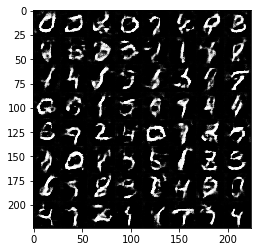

Epoch 1/2... Discriminator Loss: 0.9176... Generator Loss: 1.2751
Epoch 1/2... Discriminator Loss: 0.8978... Generator Loss: 1.2225
Epoch 1/2... Discriminator Loss: 0.9663... Generator Loss: 1.1267
Epoch 1/2... Discriminator Loss: 0.9739... Generator Loss: 1.1755
Epoch 1/2... Discriminator Loss: 0.8331... Generator Loss: 1.4505
Epoch 1/2... Discriminator Loss: 0.8624... Generator Loss: 1.4621
Epoch 1/2... Discriminator Loss: 1.1287... Generator Loss: 0.9520
Epoch 1/2... Discriminator Loss: 0.8722... Generator Loss: 1.3615
Epoch 1/2... Discriminator Loss: 0.9374... Generator Loss: 1.1762
Epoch 1/2... Discriminator Loss: 0.8523... Generator Loss: 1.4617


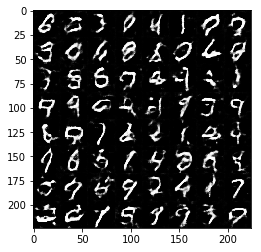

Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.4292
Epoch 1/2... Discriminator Loss: 0.7889... Generator Loss: 1.7245
Epoch 1/2... Discriminator Loss: 0.8248... Generator Loss: 1.3797
Epoch 1/2... Discriminator Loss: 0.8594... Generator Loss: 1.3560
Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 2.0424
Epoch 1/2... Discriminator Loss: 0.9899... Generator Loss: 1.1869
Epoch 1/2... Discriminator Loss: 0.8562... Generator Loss: 1.5023
Epoch 1/2... Discriminator Loss: 1.0240... Generator Loss: 1.4993
Epoch 1/2... Discriminator Loss: 0.7935... Generator Loss: 1.8596
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 1.5002


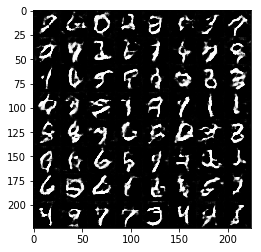

Epoch 1/2... Discriminator Loss: 1.6734... Generator Loss: 0.5614
Epoch 1/2... Discriminator Loss: 0.9401... Generator Loss: 1.1444
Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 1.8244
Epoch 1/2... Discriminator Loss: 0.9375... Generator Loss: 1.1279
Epoch 1/2... Discriminator Loss: 0.7369... Generator Loss: 1.8362
Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 1.4853
Epoch 1/2... Discriminator Loss: 2.9174... Generator Loss: 0.2075
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.7935
Epoch 1/2... Discriminator Loss: 0.9089... Generator Loss: 1.2190
Epoch 1/2... Discriminator Loss: 1.0017... Generator Loss: 1.0315


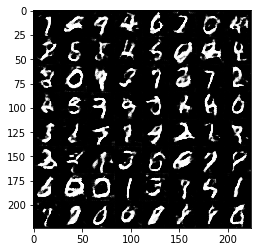

Epoch 1/2... Discriminator Loss: 0.8153... Generator Loss: 1.4749
Epoch 1/2... Discriminator Loss: 0.8579... Generator Loss: 1.3480
Epoch 1/2... Discriminator Loss: 0.7318... Generator Loss: 1.8631
Epoch 1/2... Discriminator Loss: 0.9542... Generator Loss: 2.9718
Epoch 1/2... Discriminator Loss: 0.8232... Generator Loss: 2.4610
Epoch 1/2... Discriminator Loss: 1.2956... Generator Loss: 0.8247
Epoch 1/2... Discriminator Loss: 1.3771... Generator Loss: 3.1695
Epoch 1/2... Discriminator Loss: 0.9131... Generator Loss: 1.1832
Epoch 1/2... Discriminator Loss: 0.8003... Generator Loss: 1.4705
Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 1.4480


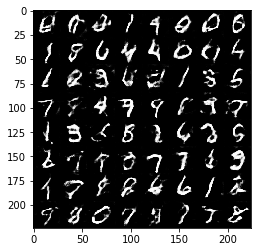

Epoch 1/2... Discriminator Loss: 1.1445... Generator Loss: 0.9073
Epoch 1/2... Discriminator Loss: 0.8538... Generator Loss: 1.6233
Epoch 1/2... Discriminator Loss: 0.8044... Generator Loss: 1.4459
Epoch 2/2... Discriminator Loss: 0.8986... Generator Loss: 1.2411
Epoch 2/2... Discriminator Loss: 0.7098... Generator Loss: 1.9475
Epoch 2/2... Discriminator Loss: 0.7619... Generator Loss: 1.7509
Epoch 2/2... Discriminator Loss: 0.8565... Generator Loss: 1.5432
Epoch 2/2... Discriminator Loss: 0.8984... Generator Loss: 1.2234
Epoch 2/2... Discriminator Loss: 0.8452... Generator Loss: 1.4229
Epoch 2/2... Discriminator Loss: 1.1268... Generator Loss: 1.1359


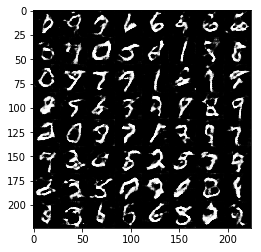

Epoch 2/2... Discriminator Loss: 0.7612... Generator Loss: 1.7198
Epoch 2/2... Discriminator Loss: 0.7261... Generator Loss: 1.9056
Epoch 2/2... Discriminator Loss: 0.7272... Generator Loss: 1.8552
Epoch 2/2... Discriminator Loss: 0.9400... Generator Loss: 1.3628
Epoch 2/2... Discriminator Loss: 0.7536... Generator Loss: 1.5755
Epoch 2/2... Discriminator Loss: 0.9542... Generator Loss: 1.1271
Epoch 2/2... Discriminator Loss: 1.0312... Generator Loss: 2.0391
Epoch 2/2... Discriminator Loss: 1.2259... Generator Loss: 0.8277
Epoch 2/2... Discriminator Loss: 0.7874... Generator Loss: 1.4358
Epoch 2/2... Discriminator Loss: 1.0039... Generator Loss: 1.0414


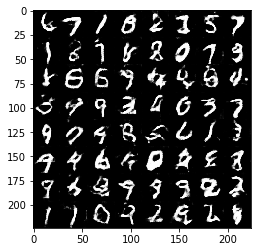

Epoch 2/2... Discriminator Loss: 0.9542... Generator Loss: 1.3455
Epoch 2/2... Discriminator Loss: 0.7001... Generator Loss: 1.8463
Epoch 2/2... Discriminator Loss: 0.7232... Generator Loss: 1.8555
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 1.5295
Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 1.5393
Epoch 2/2... Discriminator Loss: 1.5722... Generator Loss: 0.6683
Epoch 2/2... Discriminator Loss: 0.9253... Generator Loss: 1.2005
Epoch 2/2... Discriminator Loss: 1.2599... Generator Loss: 0.8653
Epoch 2/2... Discriminator Loss: 0.9215... Generator Loss: 1.2479
Epoch 2/2... Discriminator Loss: 0.7576... Generator Loss: 1.5960


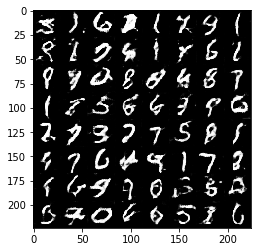

Epoch 2/2... Discriminator Loss: 0.8503... Generator Loss: 2.3926
Epoch 2/2... Discriminator Loss: 0.7878... Generator Loss: 1.9395
Epoch 2/2... Discriminator Loss: 1.6441... Generator Loss: 0.5157
Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 1.0017
Epoch 2/2... Discriminator Loss: 0.9184... Generator Loss: 2.0798
Epoch 2/2... Discriminator Loss: 0.7882... Generator Loss: 1.6883
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 1.6457
Epoch 2/2... Discriminator Loss: 1.2235... Generator Loss: 0.8341
Epoch 2/2... Discriminator Loss: 0.8555... Generator Loss: 1.4414
Epoch 2/2... Discriminator Loss: 1.7282... Generator Loss: 3.2369


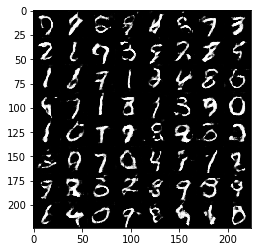

Epoch 2/2... Discriminator Loss: 0.9279... Generator Loss: 1.1710
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 1.0292
Epoch 2/2... Discriminator Loss: 0.7338... Generator Loss: 1.6964
Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.6224
Epoch 2/2... Discriminator Loss: 1.3495... Generator Loss: 0.7594
Epoch 2/2... Discriminator Loss: 0.8954... Generator Loss: 1.8507
Epoch 2/2... Discriminator Loss: 0.8240... Generator Loss: 2.0466
Epoch 2/2... Discriminator Loss: 0.7950... Generator Loss: 1.5158
Epoch 2/2... Discriminator Loss: 0.7246... Generator Loss: 1.9132
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.8340


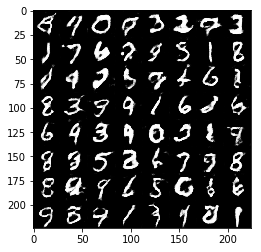

Epoch 2/2... Discriminator Loss: 0.8012... Generator Loss: 1.5105
Epoch 2/2... Discriminator Loss: 0.8003... Generator Loss: 2.4605
Epoch 2/2... Discriminator Loss: 1.0593... Generator Loss: 0.9719
Epoch 2/2... Discriminator Loss: 0.7607... Generator Loss: 1.5545
Epoch 2/2... Discriminator Loss: 1.1596... Generator Loss: 1.0768
Epoch 2/2... Discriminator Loss: 1.2108... Generator Loss: 0.8651
Epoch 2/2... Discriminator Loss: 1.0073... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 0.8109... Generator Loss: 1.4544
Epoch 2/2... Discriminator Loss: 0.7603... Generator Loss: 2.0023
Epoch 2/2... Discriminator Loss: 0.6126... Generator Loss: 2.6759


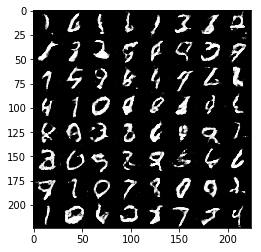

Epoch 2/2... Discriminator Loss: 0.7503... Generator Loss: 1.6951
Epoch 2/2... Discriminator Loss: 0.9211... Generator Loss: 1.2292
Epoch 2/2... Discriminator Loss: 0.7111... Generator Loss: 1.8932
Epoch 2/2... Discriminator Loss: 0.6817... Generator Loss: 2.2207
Epoch 2/2... Discriminator Loss: 0.8073... Generator Loss: 1.6022
Epoch 2/2... Discriminator Loss: 0.8178... Generator Loss: 1.5630
Epoch 2/2... Discriminator Loss: 1.2445... Generator Loss: 0.7835
Epoch 2/2... Discriminator Loss: 0.7345... Generator Loss: 1.7037
Epoch 2/2... Discriminator Loss: 0.9729... Generator Loss: 1.1756
Epoch 2/2... Discriminator Loss: 0.6895... Generator Loss: 1.8947


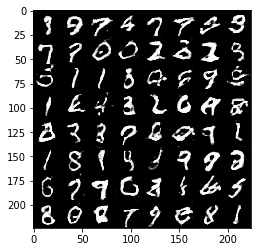

Epoch 2/2... Discriminator Loss: 1.1142... Generator Loss: 0.8798
Epoch 2/2... Discriminator Loss: 1.1139... Generator Loss: 3.5740
Epoch 2/2... Discriminator Loss: 0.8662... Generator Loss: 1.3535
Epoch 2/2... Discriminator Loss: 1.3106... Generator Loss: 0.7767
Epoch 2/2... Discriminator Loss: 0.7971... Generator Loss: 2.5162
Epoch 2/2... Discriminator Loss: 0.7610... Generator Loss: 1.6287
Epoch 2/2... Discriminator Loss: 0.6909... Generator Loss: 2.2551
Epoch 2/2... Discriminator Loss: 3.0286... Generator Loss: 5.5779
Epoch 2/2... Discriminator Loss: 0.9582... Generator Loss: 1.1488
Epoch 2/2... Discriminator Loss: 1.0435... Generator Loss: 1.0330


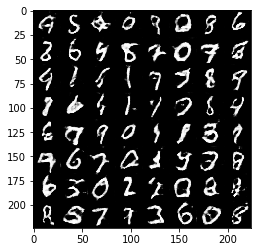

Epoch 2/2... Discriminator Loss: 0.8140... Generator Loss: 1.3947
Epoch 2/2... Discriminator Loss: 0.9969... Generator Loss: 1.0802
Epoch 2/2... Discriminator Loss: 0.9767... Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 0.7011... Generator Loss: 1.8103
Epoch 2/2... Discriminator Loss: 0.7702... Generator Loss: 2.4119
Epoch 2/2... Discriminator Loss: 0.6932... Generator Loss: 1.8813
Epoch 2/2... Discriminator Loss: 0.7262... Generator Loss: 1.8021
Epoch 2/2... Discriminator Loss: 0.7338... Generator Loss: 1.7048
Epoch 2/2... Discriminator Loss: 0.6858... Generator Loss: 2.0385
Epoch 2/2... Discriminator Loss: 0.7731... Generator Loss: 1.8531


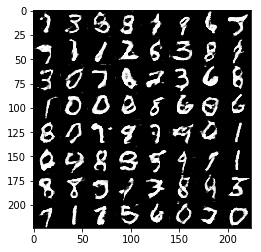

Epoch 2/2... Discriminator Loss: 0.8193... Generator Loss: 1.5548
Epoch 2/2... Discriminator Loss: 1.0108... Generator Loss: 1.0166
Epoch 2/2... Discriminator Loss: 0.9572... Generator Loss: 1.1867
Epoch 2/2... Discriminator Loss: 0.8937... Generator Loss: 1.3515
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 2.5007
Epoch 2/2... Discriminator Loss: 0.8089... Generator Loss: 1.4164
Epoch 2/2... Discriminator Loss: 0.7653... Generator Loss: 1.5384


In [13]:
batch_size = 64
z_dim = 100
learning_rate =  0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9188... Generator Loss: 0.5159
Epoch 1/1... Discriminator Loss: 0.6404... Generator Loss: 1.9753
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 5.2812
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 0.7706... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 0.8016... Generator Loss: 3.1269
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.7240... Generator Loss: 3.9551
Epoch 1/1... Discriminator Loss: 0.6837... Generator Loss: 2.4553
Epoch 1/1... Discriminator Loss: 0.6204... Generator Loss: 1.6436


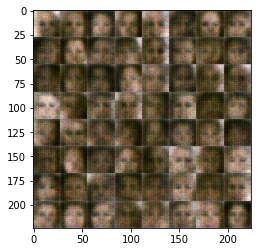

Epoch 1/1... Discriminator Loss: 0.9338... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 1.0206
Epoch 1/1... Discriminator Loss: 0.7150... Generator Loss: 1.3209
Epoch 1/1... Discriminator Loss: 1.2430... Generator Loss: 2.5322
Epoch 1/1... Discriminator Loss: 1.0195... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.1541... Generator Loss: 0.9244
Epoch 1/1... Discriminator Loss: 1.0605... Generator Loss: 0.9298
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 1.8126... Generator Loss: 0.3360
Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 1.0697


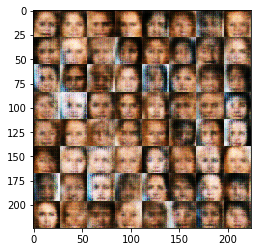

Epoch 1/1... Discriminator Loss: 1.1233... Generator Loss: 0.9319
Epoch 1/1... Discriminator Loss: 0.9609... Generator Loss: 1.5107
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 2.1627
Epoch 1/1... Discriminator Loss: 2.0254... Generator Loss: 0.2350
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.2067
Epoch 1/1... Discriminator Loss: 1.1013... Generator Loss: 0.9592
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 0.9725... Generator Loss: 0.9339
Epoch 1/1... Discriminator Loss: 0.5591... Generator Loss: 1.7029
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 1.0836


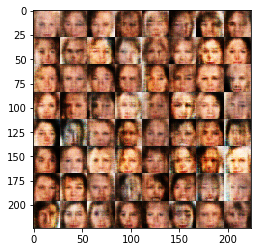

Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 0.9994
Epoch 1/1... Discriminator Loss: 1.0671... Generator Loss: 1.0292
Epoch 1/1... Discriminator Loss: 1.0268... Generator Loss: 1.6992
Epoch 1/1... Discriminator Loss: 1.1619... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.4801... Generator Loss: 1.6584
Epoch 1/1... Discriminator Loss: 1.5728... Generator Loss: 0.4080
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.6763... Generator Loss: 0.3412
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.7815


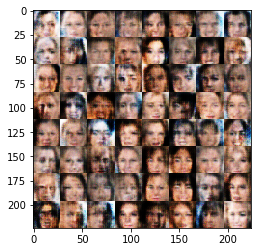

Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 1.8428
Epoch 1/1... Discriminator Loss: 1.0472... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.2322... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 1.1017
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 1.3775
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 0.9373... Generator Loss: 1.3631
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.7985


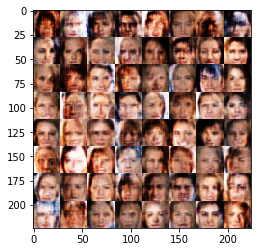

Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.5427
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 0.9923
Epoch 1/1... Discriminator Loss: 1.6537... Generator Loss: 2.3816
Epoch 1/1... Discriminator Loss: 1.1604... Generator Loss: 1.5896
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 0.8355


In [ ]:
batch_size = 64
z_dim = 100
learning_rate =  0.0008
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.